### 라이브러리 추가

In [2]:
import tensorflow as tf                #ML 백엔드로 사용
import pandas as pd                    #csv 파일 불러오기에 사용
import numpy as np                     #TF는 numpy 배열로 입력시켜야 함
# from google.colab import files         #colab 파일 업로드를 위해 사용
from matplotlib import pyplot as plt   #그래프를 그리기 위해 사용
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sns.set(font_scale=1.3)

In [77]:
train = pd.read_csv('train.csv')
test = pd.read_csv('valid.csv')

In [78]:
train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,863270,B,12.360,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,...,13.290,27.49,85.56,544.1,0.1184,0.19630,0.19370,0.08442,0.2983,0.07185
1,87556202,M,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,...,16.080,27.78,118.60,784.7,0.1316,0.46480,0.45890,0.17270,0.3000,0.08701
2,858970,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,...,11.020,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020
3,909220,B,14.040,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,...,15.660,21.58,101.20,750.0,0.1195,0.12520,0.11170,0.07453,0.2725,0.07234
4,9010333,B,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,...,9.981,17.70,65.27,302.0,0.1015,0.12480,0.09441,0.04762,0.2434,0.07431


In [79]:
test.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.34030,0.14180,0.2218,0.07820
1,9112594,B,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,...,14.34,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291
2,906539,B,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,...,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284
3,9012795,M,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,...,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.40240,0.19660,0.2730,0.08666
4,922297,B,13.87,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.02369,...,15.05,24.75,99.17,688.6,0.1264,0.2037,0.13770,0.06845,0.2249,0.08492


### 전처리

In [80]:
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)

In [81]:
train.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,B,12.360,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,...,13.290,27.49,85.56,544.1,0.1184,0.19630,0.19370,0.08442,0.2983,0.07185
1,M,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,...,16.080,27.78,118.60,784.7,0.1316,0.46480,0.45890,0.17270,0.3000,0.08701
2,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,...,11.020,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020
3,B,14.040,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,...,15.660,21.58,101.20,750.0,0.1195,0.12520,0.11170,0.07453,0.2725,0.07234
4,B,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,0.1930,...,9.981,17.70,65.27,302.0,0.1015,0.12480,0.09441,0.04762,0.2434,0.07431


In [82]:
test.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.34030,0.14180,0.2218,0.07820
1,B,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,...,14.34,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291
2,B,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,0.2031,...,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284
3,M,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,0.1973,...,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.40240,0.19660,0.2730,0.08666
4,B,13.87,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.02369,0.1620,...,15.05,24.75,99.17,688.6,0.1264,0.2037,0.13770,0.06845,0.2249,0.08492


In [83]:
train['diagnosis'].unique()

array(['B', 'M'], dtype=object)

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                284 non-null    object 
 1   radius_mean              284 non-null    float64
 2   texture_mean             284 non-null    float64
 3   perimeter_mean           284 non-null    float64
 4   area_mean                284 non-null    float64
 5   smoothness_mean          284 non-null    float64
 6   compactness_mean         284 non-null    float64
 7   concavity_mean           284 non-null    float64
 8   concave points_mean      284 non-null    float64
 9   symmetry_mean            284 non-null    float64
 10  fractal_dimension_mean   284 non-null    float64
 11  radius_se                284 non-null    float64
 12  texture_se               284 non-null    float64
 13  perimeter_se             284 non-null    float64
 14  area_se                  2

In [85]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                284 non-null    object 
 1   radius_mean              284 non-null    float64
 2   texture_mean             284 non-null    float64
 3   perimeter_mean           284 non-null    float64
 4   area_mean                284 non-null    float64
 5   smoothness_mean          284 non-null    float64
 6   compactness_mean         284 non-null    float64
 7   concavity_mean           284 non-null    float64
 8   concave points_mean      284 non-null    float64
 9   symmetry_mean            284 non-null    float64
 10  fractal_dimension_mean   284 non-null    float64
 11  radius_se                284 non-null    float64
 12  texture_se               284 non-null    float64
 13  perimeter_se             284 non-null    float64
 14  area_se                  2

### 기본 피처 사용

In [86]:
y_train = train['diagnosis']
y_test = test['diagnosis']

X_train = train.drop('diagnosis',axis=1)
X_test = test.drop('diagnosis',axis=1)

In [87]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,12.360,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066,...,13.290,27.49,85.56,544.1,0.1184,0.19630,0.19370,0.08442,0.2983,0.07185
1,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,0.06672,...,16.080,27.78,118.60,784.7,0.1316,0.46480,0.45890,0.17270,0.3000,0.08701
2,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.020,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020
3,14.040,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,0.05898,...,15.660,21.58,101.20,750.0,0.1195,0.12520,0.11170,0.07453,0.2725,0.07234
4,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,0.1930,0.06621,...,9.981,17.70,65.27,302.0,0.1015,0.12480,0.09441,0.04762,0.2434,0.07431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.680,33.48,176.50,2089.0,0.1491,0.75840,0.67800,0.29030,0.4098,0.12840
280,14.530,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,0.05746,...,16.300,28.39,108.10,830.5,0.1089,0.26490,0.37790,0.09594,0.2471,0.07463
281,11.310,19.04,71.80,394.1,0.08139,0.04701,0.03709,0.02230,0.1516,0.05667,...,12.330,23.84,78.00,466.7,0.1290,0.09148,0.14440,0.06961,0.2400,0.06641
282,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,...,20.960,29.94,151.70,1332.0,0.1037,0.39030,0.36390,0.17670,0.3176,0.10230


In [88]:
y_train = (y_train == 'M').astype('int32')
y_test = (y_test == 'M').astype('int32')

In [89]:
print(y_train,y_test)

0      0
1      1
2      0
3      0
4      0
      ..
279    1
280    0
281    0
282    1
283    1
Name: diagnosis, Length: 284, dtype: int32 0      1
1      0
2      0
3      1
4      0
      ..
279    0
280    1
281    0
282    0
283    0
Name: diagnosis, Length: 284, dtype: int32


In [90]:
X_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,...,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,14.266775,19.173063,92.954754,670.822535,0.096732,0.106770,0.093845,0.050923,0.182933,0.063090,...,16.581380,25.692958,109.341655,923.325352,0.133392,0.262213,0.288851,0.119208,0.294496,0.085258
std,3.656296,4.239066,25.133548,366.431088,0.013869,0.052470,0.082179,0.039638,0.027719,0.007766,...,5.158864,6.140551,35.708335,623.774657,0.023489,0.155182,0.214887,0.067736,0.064941,0.018828
min,7.691000,9.710000,48.340000,170.400000,0.068280,0.026500,0.000000,0.000000,0.106000,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.084090,0.043270,0.000000,0.000000,0.156600,0.055210
25%,11.520000,15.965000,73.975000,408.325000,0.086508,0.067647,0.031295,0.020910,0.165575,0.057775,...,12.837500,21.082500,83.480000,503.250000,0.117075,0.152300,0.125250,0.064730,0.253475,0.072450
50%,13.435000,18.810000,87.325000,558.200000,0.096860,0.095090,0.065780,0.036310,0.181350,0.061270,...,15.315000,25.425000,99.955000,712.250000,0.131450,0.225700,0.242500,0.105050,0.284500,0.080635
75%,16.660000,21.562500,108.175000,860.575000,0.106225,0.130800,0.134950,0.075475,0.197225,0.066438,...,19.930000,30.282500,129.325000,1230.000000,0.148125,0.350125,0.408825,0.175425,0.320150,0.092460
max,27.420000,31.120000,186.900000,2501.000000,0.163400,0.283900,0.426400,0.191300,0.274300,0.097440,...,36.040000,47.160000,251.200000,4254.000000,0.218400,0.937900,1.252000,0.291000,0.663800,0.173000


In [91]:
scaler = MinMaxScaler()

In [92]:
scaler.fit(X_train)

MinMaxScaler()

In [93]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
print(X_train.max())

1.0000000000000002


In [95]:
model = tf.keras.models.Sequential()

In [96]:
model.add(tf.keras.layers.Dense(10, input_dim=30,activation='relu'))
model.add(tf.keras.layers.Dense(30,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# 회귀모델은 accuracy 말고 loss 를 쓰는게 좋다.

In [98]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 671 (2.62 KB)

 Trainable params: 671 (2.62 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
tf_model = model.fit(X_train,y_train,epochs=30,batch_size=10)

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.4079 - loss: 0.7156 
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.6271 - loss: 0.6741
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.8205 - loss: 0.6339
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.8588 - loss: 0.5848
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.8701 - loss: 0.5256
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.8855 - loss: 0.4826
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.9259 - loss: 0.4015
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.9288 - loss: 0.3713
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.9387 - loss: 0.3188
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.9425 - loss: 0.2774
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.9394 - loss: 0.2447
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/ste

In [100]:
model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.9715 - loss: 0.1051


[0.12098211795091629, 0.9647887349128723]

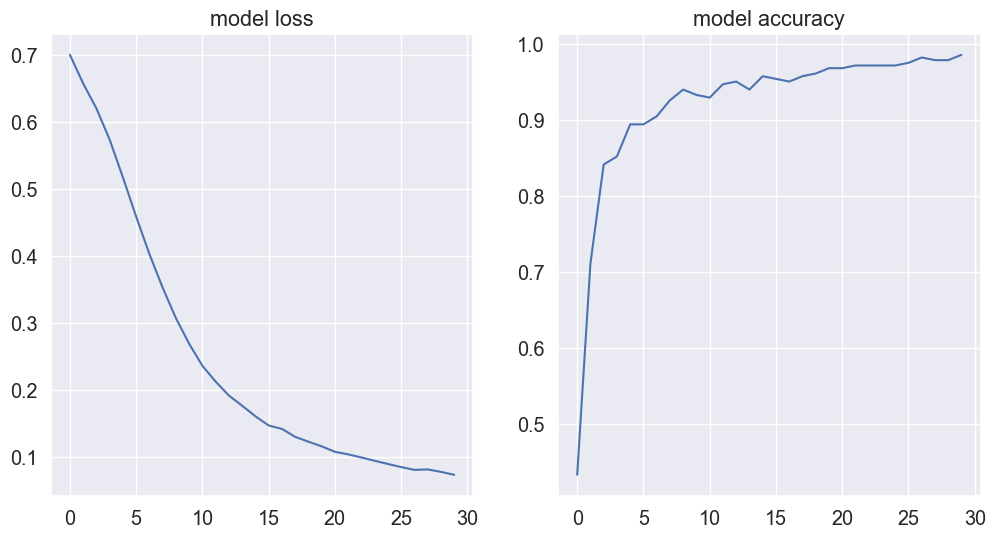

In [101]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
# tensorflow 에서 모델학습 결과를 History 로 제공한다.
plt.plot(tf_model.history['loss'])
plt.title('model loss')

plt.subplot(1,2,2)
plt.plot(tf_model.history['accuracy'])
plt.title('model accuracy')
# plt.tight_layout()
plt.show()

### predict

In [102]:
y_pred = (model.predict(X_test) > .5)
y2 = y_test.values.reshape((-1,1))
y3 = y2 == y_pred
y3.sum() / y3.shape[0]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


0.9647887323943662

---

### 피처 변경 후

---

### Radius 관련 피처 제거

'id',

'radius_mean',

'radius_se',

'radius_worst' 

제거

In [103]:
train = pd.read_csv('train.csv')
test = pd.read_csv('valid.csv')

In [105]:
drop_columns = ['radius_mean','radius_se','radius_worst']
train.drop(columns=['id']+drop_columns,inplace=True)
test.drop(columns=['id']+drop_columns,inplace=True)

y_train = train['diagnosis']
y_test = test['diagnosis']

X_train = train.drop('diagnosis',axis=1)
X_test = test.drop('diagnosis',axis=1)

In [106]:
y_train = (y_train == 'M')
y_test = (y_test == 'M')

In [107]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, input_dim=27,activation='relu'))
model.add(tf.keras.layers.Dense(30,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# 회귀모델은 accuracy 말고 loss 를 쓰는게 좋다.
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 10)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
tf_model = model.fit(X_train,y_train,epochs=30,batch_size=10)

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.6143 - loss: 0.6864 
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.6843 - loss: 0.6540
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.7670 - loss: 0.6131
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.8261 - loss: 0.5677
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.8947 - loss: 0.4876
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.9054 - loss: 0.4056
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.9354 - loss: 0.3298
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.9057 - loss: 0.3169
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.9273 - loss: 0.2574
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.9176 - loss: 0.2341
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.9371 - loss: 0.2105
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/ste

In [109]:
model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9608 - loss: 0.1146  


[0.13483509421348572, 0.9612675905227661]

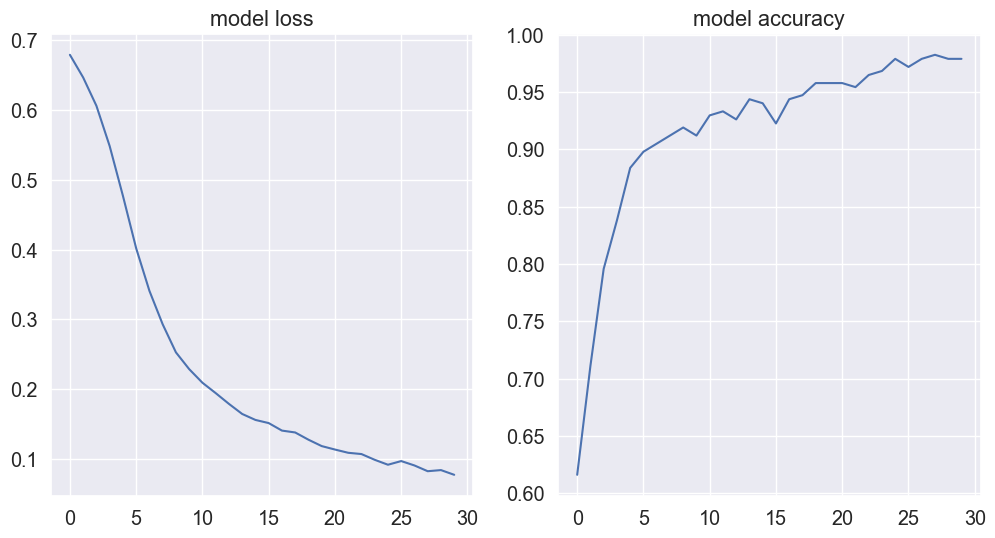

In [110]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
# tensorflow 에서 모델학습 결과를 History 로 제공한다.
plt.plot(tf_model.history['loss'])
plt.title('model loss')

plt.subplot(1,2,2)
plt.plot(tf_model.history['accuracy'])
plt.title('model accuracy')
# plt.tight_layout()
plt.show()

In [111]:
y_pred = (model.predict(X_test) > .5)
y2 = y_test.values.reshape((-1,1))
y3 = y2 == y_pred
y3.sum() / y3.shape[0]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


0.9612676056338029

결과 : 기존보다 살짝 떨어졌다.

---

### Texture 관련 피처 제거

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('valid.csv')

In [4]:
drop_columns = ['texture_mean','texture_se','texture_worst']
train.drop(columns=['id']+drop_columns,inplace=True)
test.drop(columns=['id']+drop_columns,inplace=True)

y_train = train['diagnosis']
y_test = test['diagnosis']

X_train = train.drop('diagnosis',axis=1)
X_test = test.drop('diagnosis',axis=1)

In [5]:
y_train = (y_train == 'M')
y_test = (y_test == 'M')

In [6]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, input_dim=27,activation='relu'))
model.add(tf.keras.layers.Dense(30,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# 회귀모델은 accuracy 말고 loss 를 쓰는게 좋다.
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
tf_model = model.fit(X_train,y_train,epochs=30,batch_size=10)

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - accuracy: 0.5995 - loss: 0.6845
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.7901 - loss: 0.6360
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.7960 - loss: 0.5884
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.8713 - loss: 0.5149
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.8859 - loss: 0.4349
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.9027 - loss: 0.3705
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.9139 - loss: 0.3297
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.9152 - loss: 0.2850
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.8961 - loss: 0.2656
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.9112 - loss: 0.2228
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.9185 - loss: 0.2010
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

In [8]:
model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.9664 - loss: 0.1224


[0.15171171724796295, 0.9471830725669861]

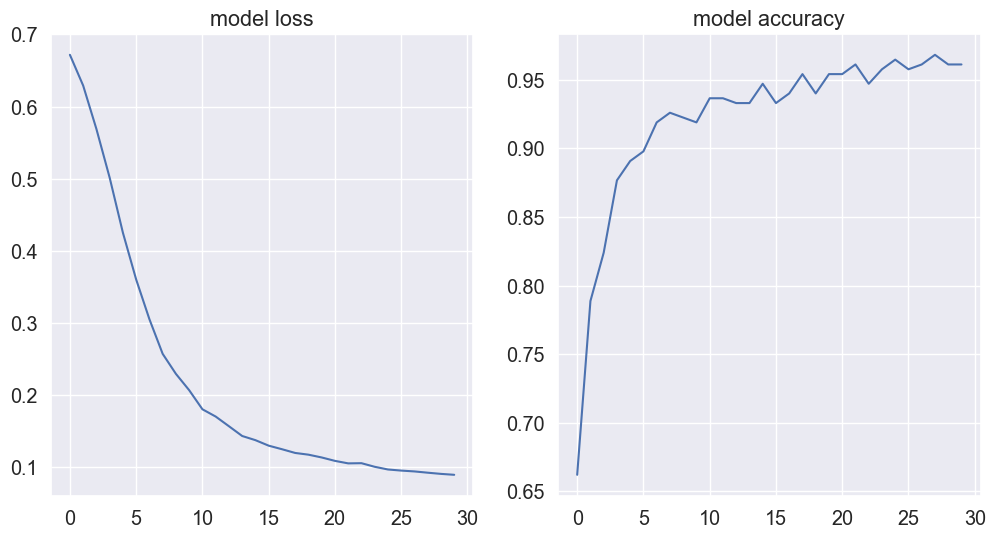

In [9]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
# tensorflow 에서 모델학습 결과를 History 로 제공한다.
plt.plot(tf_model.history['loss'])
plt.title('model loss')

plt.subplot(1,2,2)
plt.plot(tf_model.history['accuracy'])
plt.title('model accuracy')
# plt.tight_layout()
plt.show()

In [10]:
y_pred = (model.predict(X_test) > .5)
y2 = y_test.values.reshape((-1,1))
y3 = y2 == y_pred
y3.sum() / y3.shape[0]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


0.9471830985915493

결과 : 처음보다 0.02 가량 감소

---

### Perimeter 관련 피처 제거

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('valid.csv')

In [3]:
drop_columns = ['perimeter_mean','perimeter_se','perimeter_worst']
train.drop(columns=['id']+drop_columns,inplace=True)
test.drop(columns=['id']+drop_columns,inplace=True)

y_train = train['diagnosis']
y_test = test['diagnosis']

X_train = train.drop('diagnosis',axis=1)
X_test = test.drop('diagnosis',axis=1)

In [4]:
y_train = (y_train == 'M')
y_test = (y_test == 'M')

In [5]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, input_dim=27,activation='relu'))
model.add(tf.keras.layers.Dense(30,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# 회귀모델은 accuracy 말고 loss 를 쓰는게 좋다.
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
tf_model = model.fit(X_train,y_train,epochs=30,batch_size=10)

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6278 - loss: 0.6848   
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.8488 - loss: 0.6535
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.8641 - loss: 0.6161
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.8835 - loss: 0.5645
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.8456 - loss: 0.5283
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.9140 - loss: 0.4653
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9195 - loss: 0.3987 
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.9304 - loss: 0.3440
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.9143 - loss: 0.3184
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.9153 - loss: 0.2959
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.9258 - loss: 0.2442
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

In [7]:
model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9667 - loss: 0.1169  


[0.12753383815288544, 0.9612675905227661]

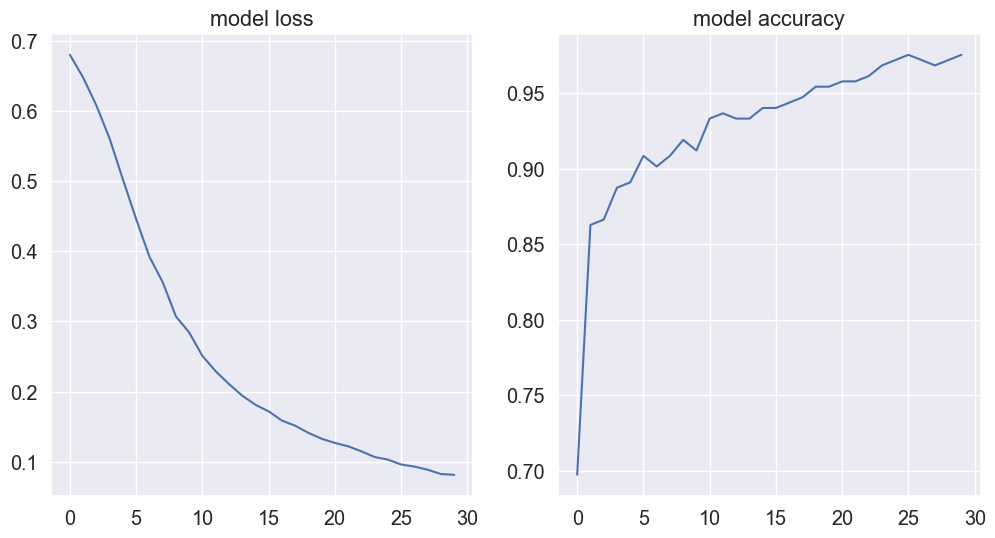

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
# tensorflow 에서 모델학습 결과를 History 로 제공한다.
plt.plot(tf_model.history['loss'])
plt.title('model loss')

plt.subplot(1,2,2)
plt.plot(tf_model.history['accuracy'])
plt.title('model accuracy')
# plt.tight_layout()
plt.show()

In [9]:
y_pred = (model.predict(X_test) > .5)
y2 = y_test.values.reshape((-1,1))
y3 = y2 == y_pred
y3.sum() / y3.shape[0]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


0.9612676056338029

결과 : 처음과 별차이 없다.

---

### Area 관련 피처 제거

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('valid.csv')

In [3]:
drop_columns = ['area_mean','area_se','area_worst']
train.drop(columns=['id']+drop_columns,inplace=True)
test.drop(columns=['id']+drop_columns,inplace=True)

y_train = train['diagnosis']
y_test = test['diagnosis']

X_train = train.drop('diagnosis',axis=1)
X_test = test.drop('diagnosis',axis=1)

In [4]:
y_train = (y_train == 'M')
y_test = (y_test == 'M')

In [5]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, input_dim=27,activation='relu'))
model.add(tf.keras.layers.Dense(30,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# 회귀모델은 accuracy 말고 loss 를 쓰는게 좋다.
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
tf_model = model.fit(X_train,y_train,epochs=30,batch_size=10)

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6255 - loss: 0.7045   
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.6039 - loss: 0.6802
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.6035 - loss: 0.6467
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.6835 - loss: 0.5906
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.7837 - loss: 0.5667
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.8458 - loss: 0.5012
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.8519 - loss: 0.4390
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.9046 - loss: 0.3719
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8772 - loss: 0.3335 
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9150 - loss: 0.2810 
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.9260 - loss: 0.2592
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step 

In [7]:
model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.9493 - loss: 0.1107


[0.1269703507423401, 0.9577465057373047]

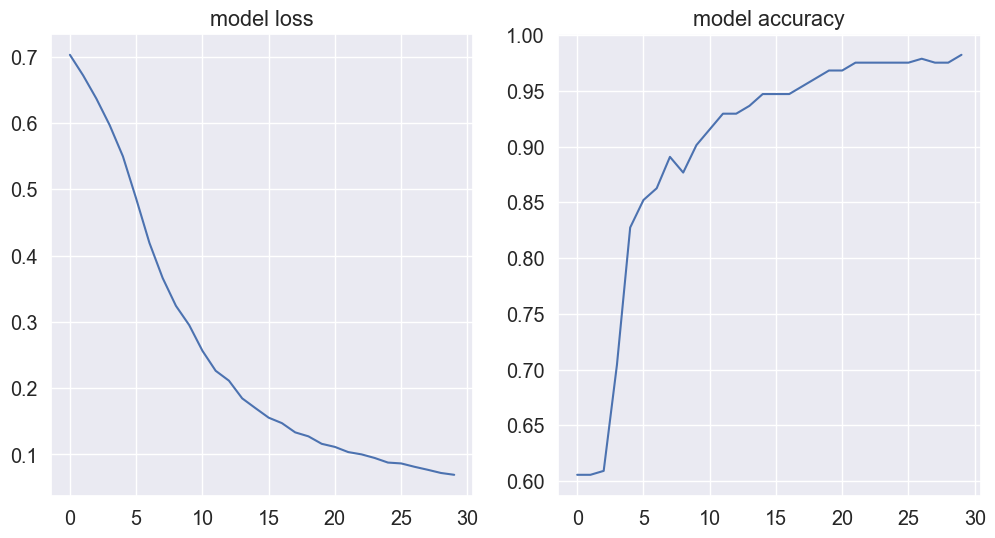

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
# tensorflow 에서 모델학습 결과를 History 로 제공한다.
plt.plot(tf_model.history['loss'])
plt.title('model loss')

plt.subplot(1,2,2)
plt.plot(tf_model.history['accuracy'])
plt.title('model accuracy')
# plt.tight_layout()
plt.show()

In [9]:
y_pred = (model.predict(X_test) > .5)
y2 = y_test.values.reshape((-1,1))
y3 = y2 == y_pred
y3.sum() / y3.shape[0]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


0.9577464788732394

결과 : 처음보다 0.01 가량 감소했다.

---

### Smoothness 관련 피처 제거

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('valid.csv')

In [3]:
drop_columns = ['smoothness_mean','smoothness_se','smoothness_worst']
train.drop(columns=['id']+drop_columns,inplace=True)
test.drop(columns=['id']+drop_columns,inplace=True)

y_train = train['diagnosis']
y_test = test['diagnosis']

X_train = train.drop('diagnosis',axis=1)
X_test = test.drop('diagnosis',axis=1)

In [4]:
y_train = (y_train == 'M')
y_test = (y_test == 'M')

In [5]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, input_dim=27,activation='relu'))
model.add(tf.keras.layers.Dense(30,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# 회귀모델은 accuracy 말고 loss 를 쓰는게 좋다.
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
tf_model = model.fit(X_train,y_train,epochs=30,batch_size=10)

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step - accuracy: 0.6544 - loss: 0.6835
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.8551 - loss: 0.6460
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8804 - loss: 0.5914 
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.8523 - loss: 0.5244
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8948 - loss: 0.4439 
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.8802 - loss: 0.4021
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.8722 - loss: 0.3609
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.9289 - loss: 0.2745
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.9039 - loss: 0.2709
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8858 - loss: 0.2476 
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9349 - loss: 0.2151
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accu

In [7]:
model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.9539 - loss: 0.1245


[0.13091713190078735, 0.9577465057373047]

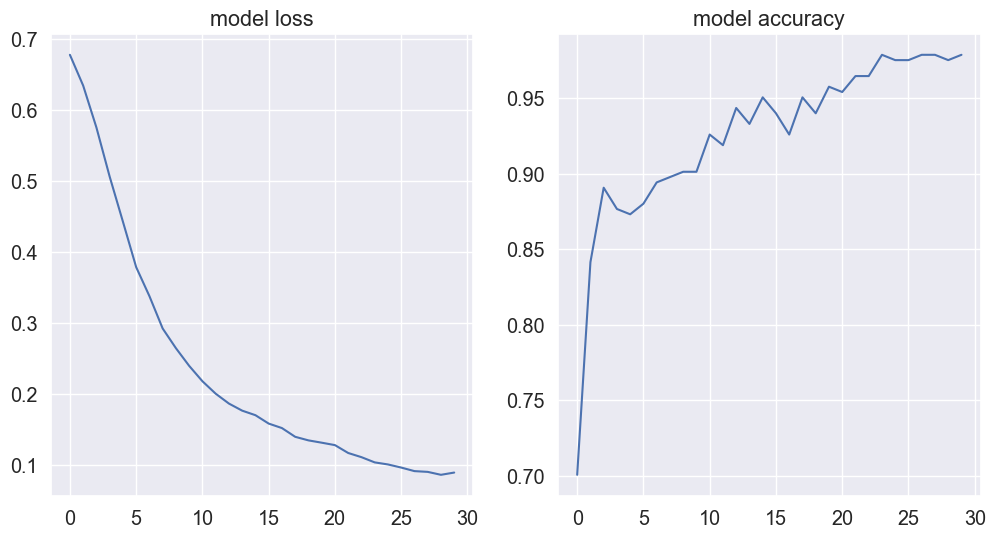

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
# tensorflow 에서 모델학습 결과를 History 로 제공한다.
plt.plot(tf_model.history['loss'])
plt.title('model loss')

plt.subplot(1,2,2)
plt.plot(tf_model.history['accuracy'])
plt.title('model accuracy')
# plt.tight_layout()
plt.show()

In [9]:
y_pred = (model.predict(X_test) > .5)
y2 = y_test.values.reshape((-1,1))
y3 = y2 == y_pred
y3.sum() / y3.shape[0]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


0.9577464788732394

결과 : 처음보다 0.01 가량 감소

---

### Compactness 관련 피처 제거

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('valid.csv')

In [3]:
drop_columns = ['compactness_mean','compactness_se','compactness_worst']
train.drop(columns=['id']+drop_columns,inplace=True)
test.drop(columns=['id']+drop_columns,inplace=True)

y_train = train['diagnosis']
y_test = test['diagnosis']

X_train = train.drop('diagnosis',axis=1)
X_test = test.drop('diagnosis',axis=1)

In [4]:
y_train = (y_train == 'M')
y_test = (y_test == 'M')

In [5]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, input_dim=27,activation='relu'))
model.add(tf.keras.layers.Dense(30,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# 회귀모델은 accuracy 말고 loss 를 쓰는게 좋다.
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
tf_model = model.fit(X_train,y_train,epochs=30,batch_size=10)

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - accuracy: 0.6205 - loss: 0.6904
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.6364 - loss: 0.6645
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.7475 - loss: 0.6346
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8646 - loss: 0.5779
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8682 - loss: 0.5189
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8827 - loss: 0.4467 
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8754 - loss: 0.3980 
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8866 - loss: 0.3344 
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9084 - loss: 0.2795
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.9011 - loss: 0.2650
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.9420 - loss: 0.2096
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accura

In [7]:
model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.9460 - loss: 0.1177


[0.1347777247428894, 0.9507042169570923]

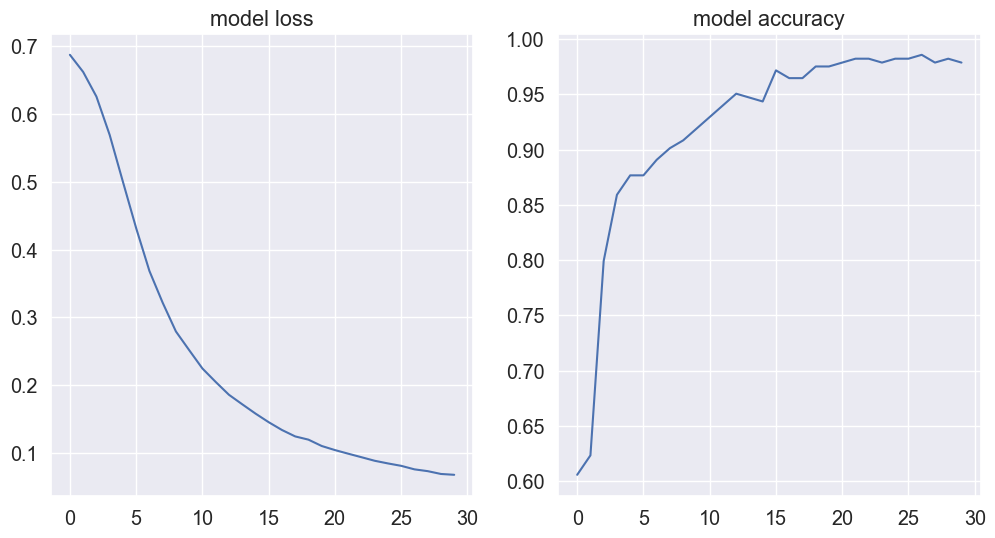

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
# tensorflow 에서 모델학습 결과를 History 로 제공한다.
plt.plot(tf_model.history['loss'])
plt.title('model loss')

plt.subplot(1,2,2)
plt.plot(tf_model.history['accuracy'])
plt.title('model accuracy')
# plt.tight_layout()
plt.show()

In [9]:
y_pred = (model.predict(X_test) > .5)
y2 = y_test.values.reshape((-1,1))
y3 = y2 == y_pred
y3.sum() / y3.shape[0]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


0.9507042253521126

결과 : 처음보다 0.01 가량 감소

---

### Concave Points 관련 피처 제거

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('valid.csv')

In [3]:
drop_columns = ['concave points_mean','concave points_se','concave points_worst']
train.drop(columns=['id']+drop_columns,inplace=True)
test.drop(columns=['id']+drop_columns,inplace=True)

y_train = train['diagnosis']
y_test = test['diagnosis']

X_train = train.drop('diagnosis',axis=1)
X_test = test.drop('diagnosis',axis=1)

In [4]:
y_train = (y_train == 'M')
y_test = (y_test == 'M')

In [5]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, input_dim=27,activation='relu'))
model.add(tf.keras.layers.Dense(30,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# 회귀모델은 accuracy 말고 loss 를 쓰는게 좋다.
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
tf_model = model.fit(X_train,y_train,epochs=30,batch_size=10)

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - accuracy: 0.5081 - loss: 0.6896 
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.8731 - loss: 0.6506
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.8822 - loss: 0.6143
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.8712 - loss: 0.5518
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.8995 - loss: 0.4762
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.9106 - loss: 0.4037
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.9118 - loss: 0.3633
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.8979 - loss: 0.3148
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.9163 - loss: 0.2901
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.9253 - loss: 0.2512
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.9341 - loss: 0.2218
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/ste

In [7]:
model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.9704 - loss: 0.1018


[0.11783017218112946, 0.9612675905227661]

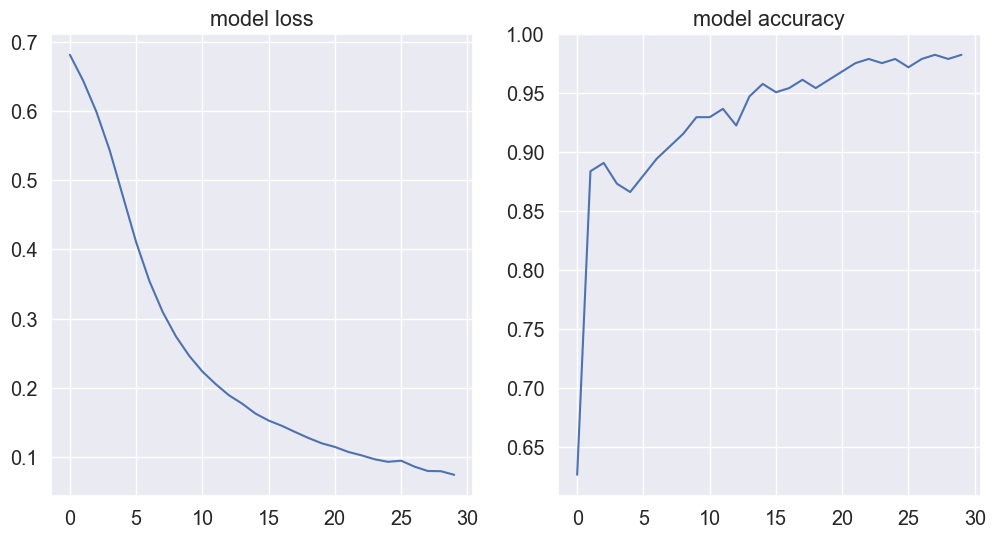

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
# tensorflow 에서 모델학습 결과를 History 로 제공한다.
plt.plot(tf_model.history['loss'])
plt.title('model loss')

plt.subplot(1,2,2)
plt.plot(tf_model.history['accuracy'])
plt.title('model accuracy')
# plt.tight_layout()
plt.show()

In [9]:
y_pred = (model.predict(X_test) > .5)
y2 = y_test.values.reshape((-1,1))
y3 = y2 == y_pred
y3.sum() / y3.shape[0]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


0.9612676056338029

결과 : 기존과 별차이 없다

---

### Symmetry 관련 피처 제거

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('valid.csv')

In [3]:
drop_columns = ['symmetry_mean','symmetry_se','symmetry_worst']
train.drop(columns=['id']+drop_columns,inplace=True)
test.drop(columns=['id']+drop_columns,inplace=True)

y_train = train['diagnosis']
y_test = test['diagnosis']

X_train = train.drop('diagnosis',axis=1)
X_test = test.drop('diagnosis',axis=1)

In [4]:
y_train = (y_train == 'M')
y_test = (y_test == 'M')

In [5]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, input_dim=27,activation='relu'))
model.add(tf.keras.layers.Dense(30,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# 회귀모델은 accuracy 말고 loss 를 쓰는게 좋다.
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
tf_model = model.fit(X_train,y_train,epochs=30,batch_size=10)

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.5017 - loss: 0.6695 
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.7776 - loss: 0.6193
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.8380 - loss: 0.5656
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.9049 - loss: 0.4988
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9148 - loss: 0.4174
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.9212 - loss: 0.3417
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.9323 - loss: 0.3118
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.9079 - loss: 0.2805
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.9280 - loss: 0.2283
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.9110 - loss: 0.2330
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.8879 - loss: 0.2213
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/ste

In [7]:
model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.9671 - loss: 0.1003


[0.12481215596199036, 0.9542253613471985]

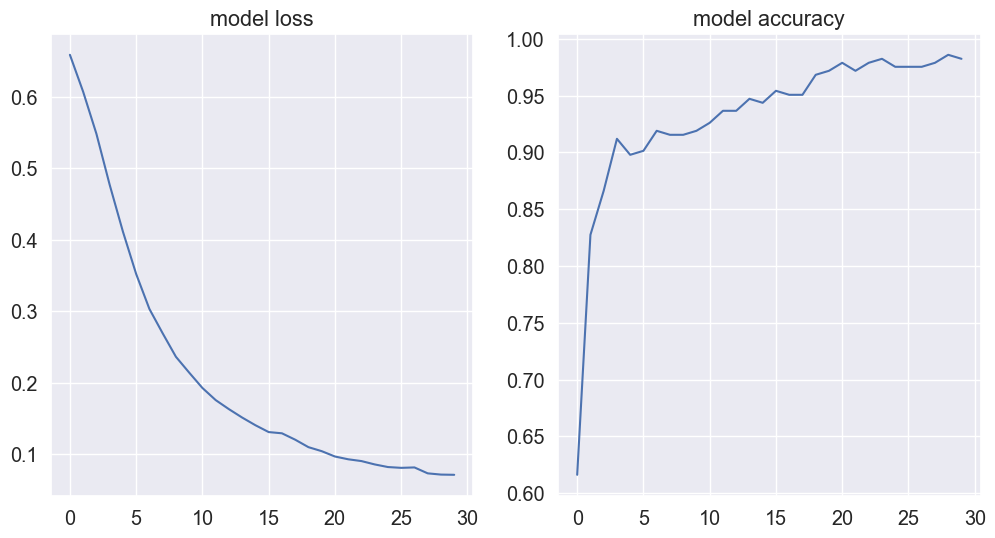

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
# tensorflow 에서 모델학습 결과를 History 로 제공한다.
plt.plot(tf_model.history['loss'])
plt.title('model loss')

plt.subplot(1,2,2)
plt.plot(tf_model.history['accuracy'])
plt.title('model accuracy')
# plt.tight_layout()
plt.show()

In [9]:
y_pred = (model.predict(X_test) > .5)
y2 = y_test.values.reshape((-1,1))
y3 = y2 == y_pred
y3.sum() / y3.shape[0]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


0.954225352112676

결과 : 기존보다 0.01 가량 떨어졌다.

---

### Fractal Dimension 관련 피처 제거

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('valid.csv')

In [3]:
drop_columns = ['fractal_dimension_mean','fractal_dimension_se','fractal_dimension_worst']
train.drop(columns=['id']+drop_columns,inplace=True)
test.drop(columns=['id']+drop_columns,inplace=True)

y_train = train['diagnosis']
y_test = test['diagnosis']

X_train = train.drop('diagnosis',axis=1)
X_test = test.drop('diagnosis',axis=1)

In [4]:
y_train = (y_train == 'M')
y_test = (y_test == 'M')

In [5]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, input_dim=27,activation='relu'))
model.add(tf.keras.layers.Dense(30,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# 회귀모델은 accuracy 말고 loss 를 쓰는게 좋다.
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
tf_model = model.fit(X_train,y_train,epochs=30,batch_size=10)

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6200 - loss: 0.6792
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7548 - loss: 0.6421 
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.8074 - loss: 0.5890
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.8243 - loss: 0.5339
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.8673 - loss: 0.4759
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8475 - loss: 0.3968 
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8854 - loss: 0.3748 
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9088 - loss: 0.2876 
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9073 - loss: 0.2936 
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9316 - loss: 0.2362 
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9381 - loss: 0.2068 
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accura

In [7]:
model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.9799 - loss: 0.1082


[0.1397377848625183, 0.9718309640884399]

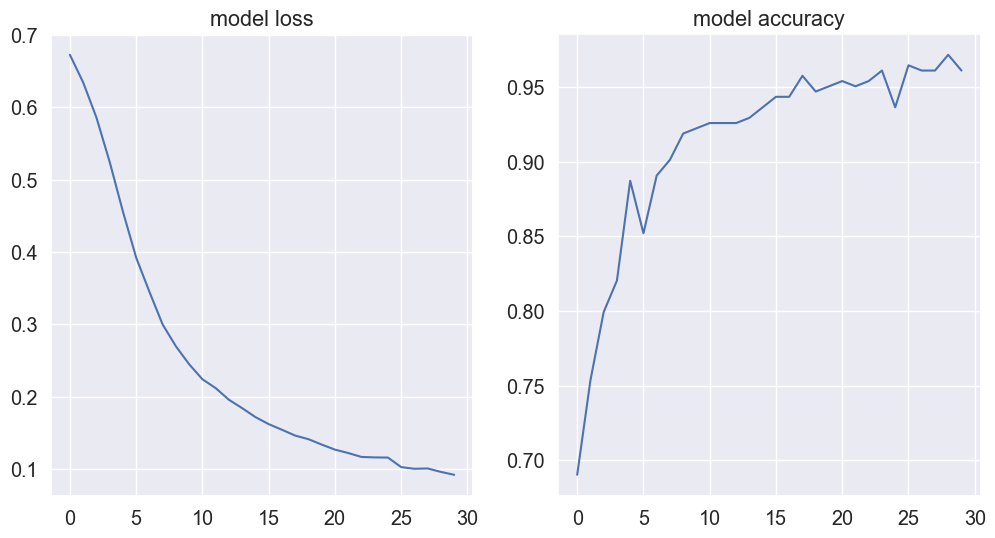

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
# tensorflow 에서 모델학습 결과를 History 로 제공한다.
plt.plot(tf_model.history['loss'])
plt.title('model loss')

plt.subplot(1,2,2)
plt.plot(tf_model.history['accuracy'])
plt.title('model accuracy')
# plt.tight_layout()
plt.show()

In [9]:
y_pred = (model.predict(X_test) > .5)
y2 = y_test.values.reshape((-1,1))
y3 = y2 == y_pred
y3.sum() / y3.shape[0]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


0.971830985915493

결과 : 기존보다 0.01 가량 상승했다.

---

### 피처 제거 후 결과값들 시각화

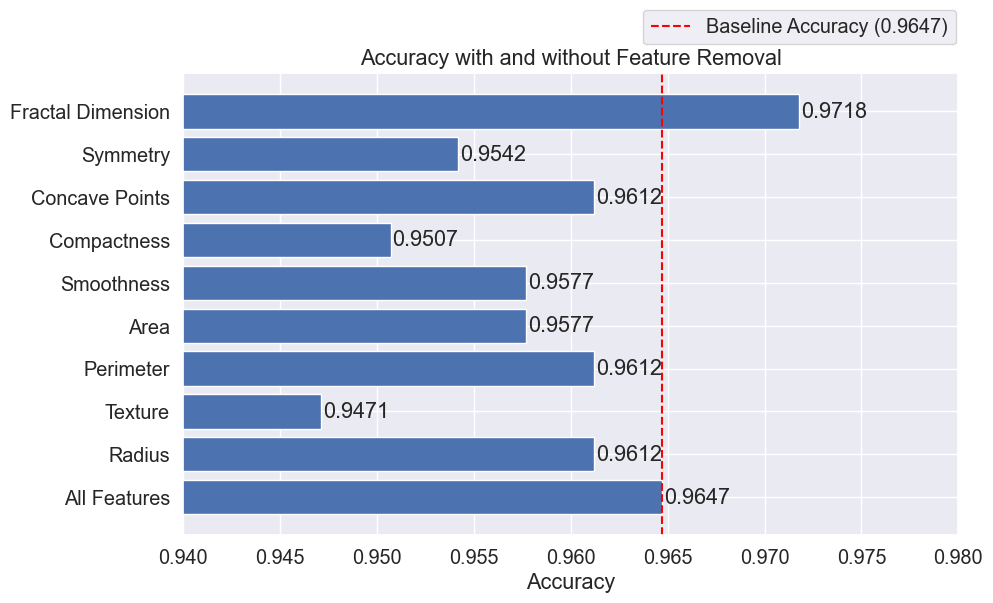

In [3]:
# 피처 이름과 관련된 정확도 값들
features = ['All Features', 'Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concave Points', 'Symmetry', 'Fractal Dimension']
accuracy = [0.9647, 0.9612, 0.9471, 0.9612, 0.9577, 0.9577, 0.9507, 0.9612, 0.9542, 0.9718]
baseline_accuracy = accuracy[0]
# 시각화
plt.figure(figsize=(10, 6))
bars = plt.barh(features, accuracy)
plt.axvline(x=baseline_accuracy, color='red', linestyle='--', label=f'Baseline Accuracy ({baseline_accuracy})')  # 기준선 추가
plt.xlabel('Accuracy')
plt.title('Accuracy with and without Feature Removal')
plt.xlim(0.94, 0.98)  # 범위를 맞추기 위해 x축 범위 조정
plt.grid(True)
plt.legend()

# 범례를 그래프 밖으로 설정
plt.legend(loc='center left', bbox_to_anchor=(0.58,1.1))


# 각 막대 위에 정확도 수치 표시
for bar in bars:
    plt.text(bar.get_width() + 0.0001, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', va='center')

plt.show()




---